## Elementele unei figuri în matplotlib

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

Un grafic este o ierarhie de obiecte Python. Un obiect **Figure** este containerul extern pentru o reprezentare grafică matplotlib, care poate conține mai multe obiecte **Axes**. Un **Axes** se traduce în ceea ce considerăm a fi un singur plot sau grafic (fiți atenți deoarece în engleză plural la axes este axis, deci fiecare obiect Axes va avea doua axe - doua **axis**).

Un obiect **Figure** este ca un container care conține unul sau mai multe obiecte **Axes** (reprezentări grafice efective). Sub **Axes** în ierarhie sunt obiecte mai mici cum ar fi marcajele de divizare, linii individuale, legende și casete de text. Aproape fiecare "element" al unui grafic este propriul său obiect manipulabil în Python.


![](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)

<class 'matplotlib.figure.Figure'>


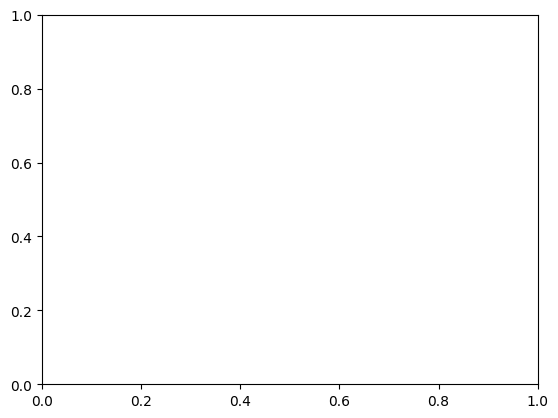

In [7]:
fig, _ = plt.subplots()
print (type(fig))

Deasupra, am creat două variabile cu plt.subplots(). Prima este un obiect **Figure** de nivel superior. A doua este o variabilă "temporară" de care nu avem nevoie încă, indicată cu o bară jos. Ierarhia figurii este ușor de accesat și putem de exemplu vedea tick-urile majore ale axei y a primului obiect Axes:

In [8]:
one_tick = fig.axes[0].yaxis.get_major_ticks()[0]
print(one_tick.label1)
print(type(one_tick))

Text(0, 0.0, '0.0')
<class 'matplotlib.axis.YTick'>


Mai sus, fig (o instanță de clasă **Figure**) are mai multe **Axes** (o listă, din care luăm primul element). Fiecare **Axes** are o yaxis și xaxis, fiecare având o colecție de "major ticks", și noi luăm primul.

Documentația Matplotlib prezintă acest lucru ca o anatomie a figurii, mai degrabă decât o ierarhie explicită:

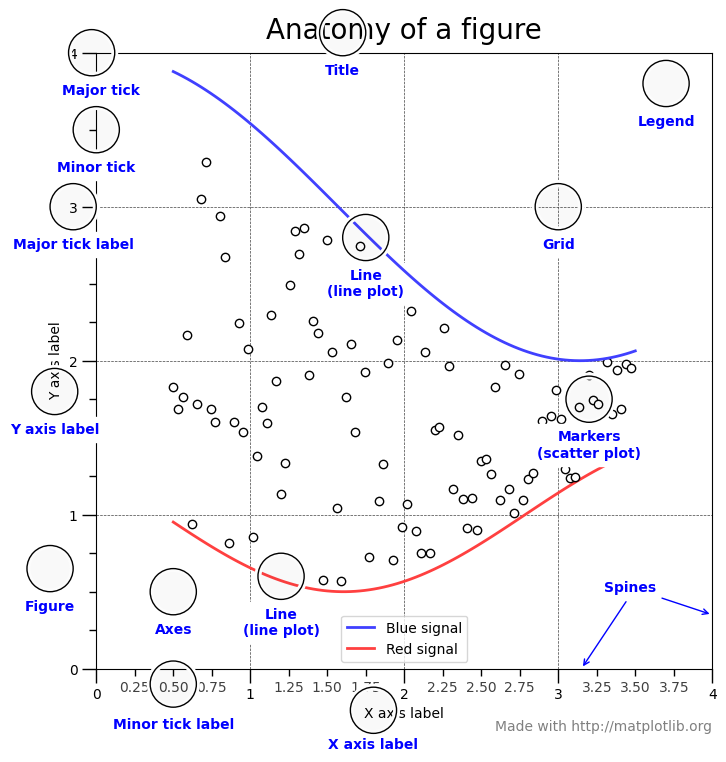

In [9]:
np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()